In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [8]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/results/visualisation/exp1/20210417-005045/pose_1.csv")

In [9]:
print(data)
num = 1
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


    time  ID             x  x_idx         y  y_idx       yaw
0    0.0   0  3.252072e-07     50  0.000215     50  1.569258
1    0.1   0  1.909608e-05     50  0.047095     50  1.570706
2    0.2   0  1.104874e-03     50  0.290401     53  1.521502
3    0.3   0  9.194185e-02     51  0.673935     57  1.164627
4    0.4   0  3.152311e-01     53  1.032015     60  0.902801
5    0.5   0  5.839102e-01     56  1.395579     64  0.949632
6    0.6   0  7.816009e-01     58  1.802494     68  1.303447
7    0.7   0  8.232820e-01     58  2.216208     72  1.602470
8    0.8   0  7.391123e-01     57  2.633778     76  1.940489
9    0.9   0  5.167847e-01     55  3.002237     80  2.239986
10   1.0   0  2.186986e-01     52  3.304235     83  2.411178
11   1.1   0 -1.212667e-01     49  3.605138     86  2.392100
12   1.2   0 -3.953978e-01     46  3.891659     89  2.276021


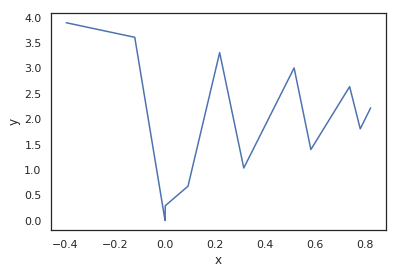

In [10]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

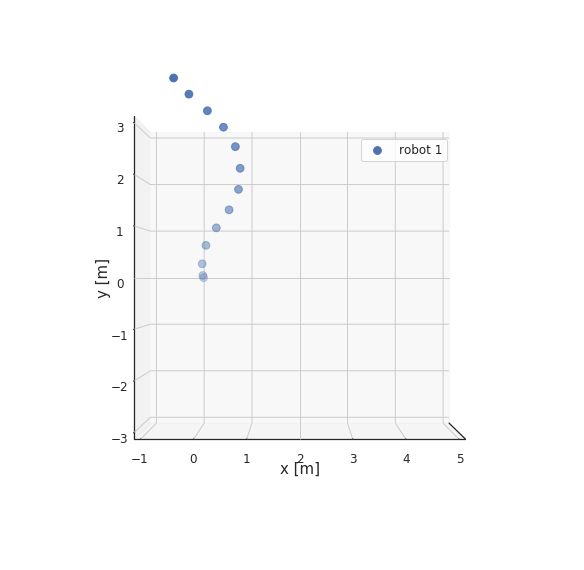

In [11]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']



#ax.set_xlabel("time")
ax.set_ylabel("x [m]", fontsize = 15)
ax.set_zlabel("y [m]", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=60)

ax.set_ylim([-1, 5])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.780), fontsize=12)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [12]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
euclidean_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
        

for j in range(num):
    #print(x_arr[j])
    euclidean_dist[j] += sqrt((x[j][0]-x[j][-1])**2+(y[j][0]-y[j][-1])**2)
print(traj_dist)
print(euclidean_dist)
print(np.average(np.array(euclidean_dist)/np.array(traj_dist)))



[4.557781902890851]
[3.9114799930528936]
0.8581981490979133
